## 1. Objective of the Project
To analyze survey data on social media usage and its potential impact on mental health indicators like sleep issues, depression, and relationship status.

## 2. Import Libraries
We'll need some common Python libraries for data manipulation and visualization.

In [2]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For visualization

## 3. Problem Statement
We aim to clean and analyze survey data to uncover trends and relationships between social media usage and mental health indicators, such as sleep quality, depression frequency, and time spent on social media.

## 4. Data Reading
Read the dataset, inspect the structure, and display basic information.

In [3]:
df = pd.read_csv("C:/Users/admin/Documents/Anudip Foundation/Sprint 1/smmh.csv")

# Display dataset information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 

In [4]:
# Display dataset shape
print(f"\nShape of the dataset: {df.shape}")


Shape of the dataset: (481, 21)


In [5]:
# Display the first few rows of the dataset
print("\nSample Data:")
print(df.head())


Sample Data:
            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use so

## 5. Data Cleaning
* Identify and handle missing values.
* Drop duplicate rows.

In [6]:
# Check for missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                       

In [8]:
# Fill missing values in the organization column with 'Unknown'
df['5. What type of organizations are you affiliated with?'] = df['5. What type of organizations are you affiliated with?'].fillna('Unknown')

In [9]:
# Again checking for assurance
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                              

In [10]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# Verify changes
print(f"\nShape after cleaning: {df.shape}")
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Shape after cleaning: (481, 21)

Missing Values After Cleaning:
Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                              

## 6. Data Visualization
We'll generate five different plots to visualize key trends in the dataset.

1. Bar Chart: Gender Distribution
2. Pie Chart: Relationship Status Distribution
3. Horizontal Bar Plot: Social Media Usage
4. Line Plot: Average Social Media Time by Age
5. Scatter Plot: Sleep Issues vs. Depression Frequency

1. Bar Chart: Gender Distribution

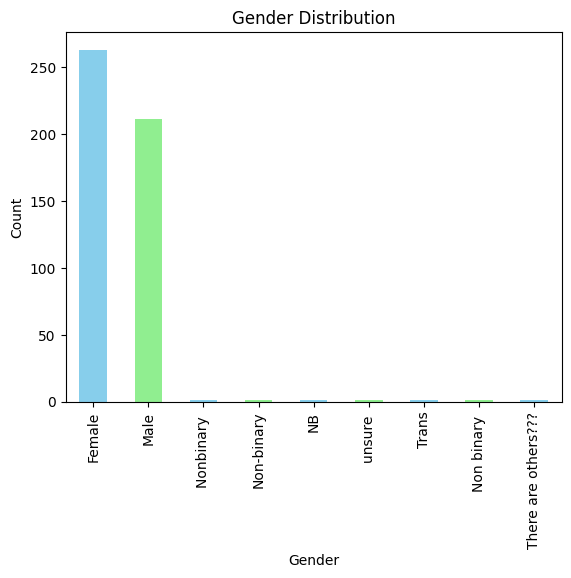

In [12]:
df['2. Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'], title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

2. Pie Chart: Relationship Status Distribution

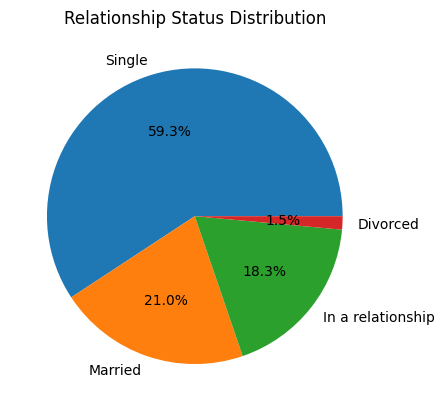

In [13]:
df['3. Relationship Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Relationship Status Distribution')
plt.ylabel('')  # Hide ylabel
plt.show()


3. Horizontal Bar Plot: Social Media Usage Frequency

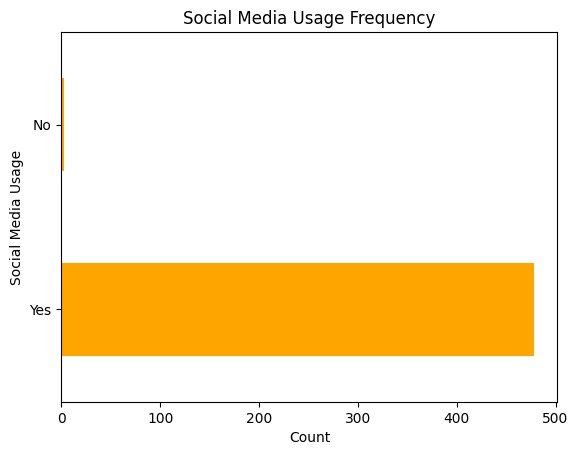

In [14]:
df['6. Do you use social media?'].value_counts().plot(kind='barh', color='orange', title='Social Media Usage Frequency')
plt.xlabel('Count')
plt.ylabel('Social Media Usage')
plt.show()


4. Line Plot: Average Social Media Time by Age

['Between 2 and 3 hours' 'More than 5 hours' 'Between 3 and 4 hours'
 'Less than an Hour' 'Between 1 and 2 hours' 'Between 4 and 5 hours']


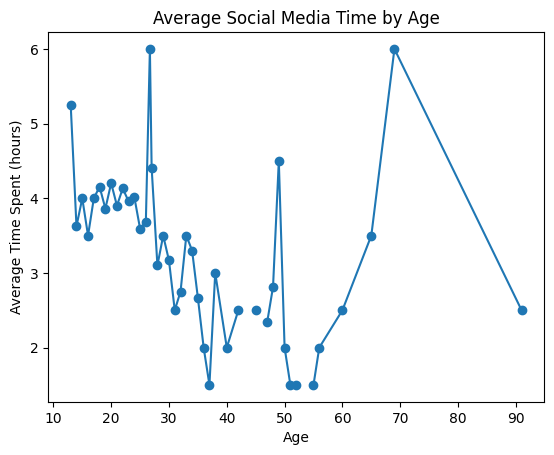

In [16]:
# Inspect unique values in the column to understand their format
print(df['8. What is the average time you spend on social media every day?'].unique())

# Define a mapping of ranges to approximate numerical values (e.g., midpoint of range)
time_mapping = {
    'Less than 1 hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 6,  # assuming 6 as an approximation
}

# Apply the mapping to convert text to numeric
df['8. What is the average time you spend on social media every day?'] = df[
    '8. What is the average time you spend on social media every day?'
].map(time_mapping)

# Now, group by age and plot the average social media time
df.groupby('1. What is your age?')['8. What is the average time you spend on social media every day?'].mean().plot(
    kind='line', marker='o', title='Average Social Media Time by Age'
)
plt.xlabel('Age')
plt.ylabel('Average Time Spent (hours)')
plt.show()


5. Scatter Plot: Sleep Issues vs. Depression Frequency

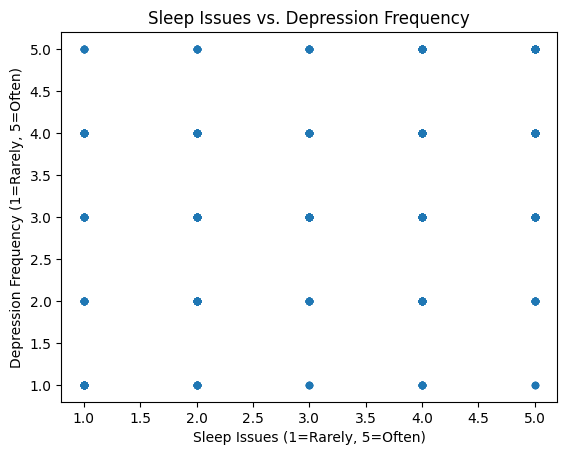

In [17]:
df.plot.scatter(x='20. On a scale of 1 to 5, how often do you face issues regarding sleep?', 
                y='18. How often do you feel depressed or down?', 
                title='Sleep Issues vs. Depression Frequency')
plt.xlabel('Sleep Issues (1=Rarely, 5=Often)')
plt.ylabel('Depression Frequency (1=Rarely, 5=Often)')
plt.show()


6. Bar Plot: Distribution of the organization types.

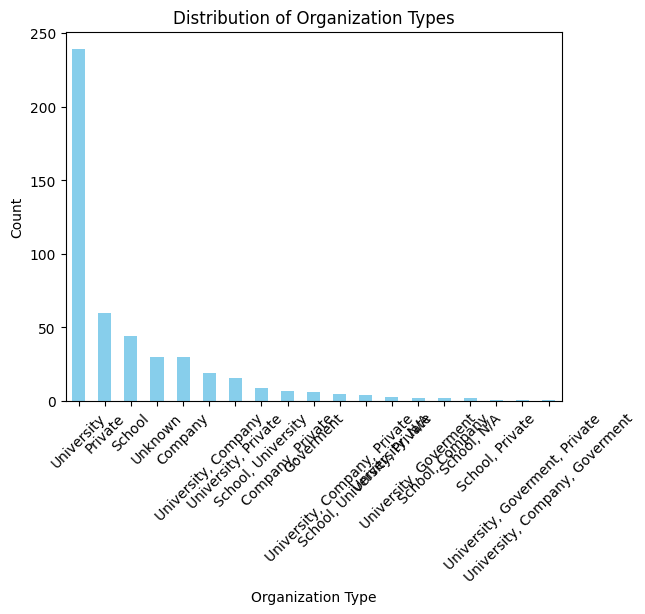

In [18]:
df['5. What type of organizations are you affiliated with?'].value_counts().plot(kind='bar', color='skyblue', title='Distribution of Organization Types')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


7. Pie Chart: Percentage of time spent on social media categories.

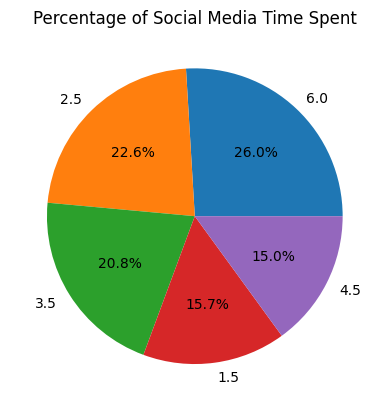

In [19]:
df['8. What is the average time you spend on social media every day?'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', title='Percentage of Social Media Time Spent'
)
plt.ylabel('')
plt.show()


8. Horizontal Bar Chart: Average social media time by organization type.

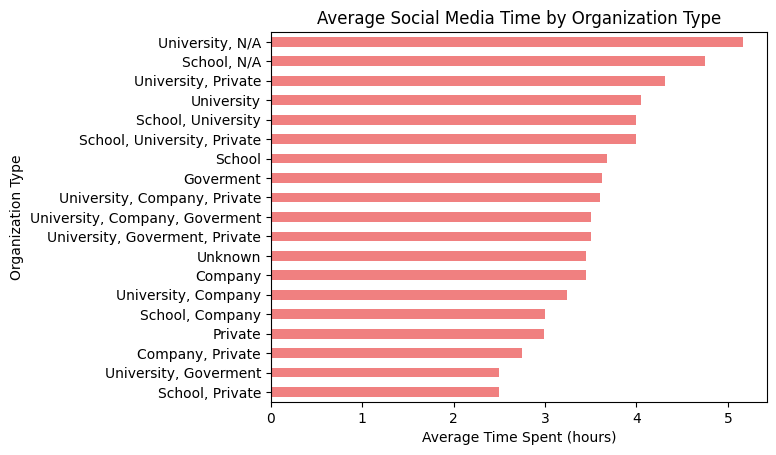

In [20]:
df.groupby('5. What type of organizations are you affiliated with?')['8. What is the average time you spend on social media every day?'].mean().sort_values().plot(
    kind='barh', color='lightcoral', title='Average Social Media Time by Organization Type'
)
plt.xlabel('Average Time Spent (hours)')
plt.ylabel('Organization Type')
plt.show()


9. Scatter Plot: Social media time vs. age.

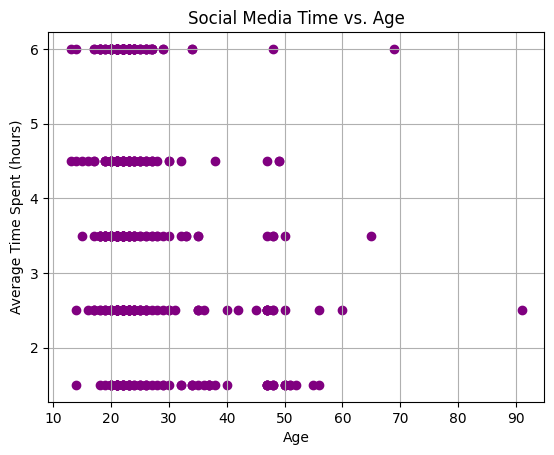

In [21]:
plt.scatter(
    df['1. What is your age?'],
    df['8. What is the average time you spend on social media every day?'],
    color='purple'
)
plt.title('Social Media Time vs. Age')
plt.xlabel('Age')
plt.ylabel('Average Time Spent (hours)')
plt.grid(True)
plt.show()


10. Heatmap: Correlation between numeric columns.

In [24]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


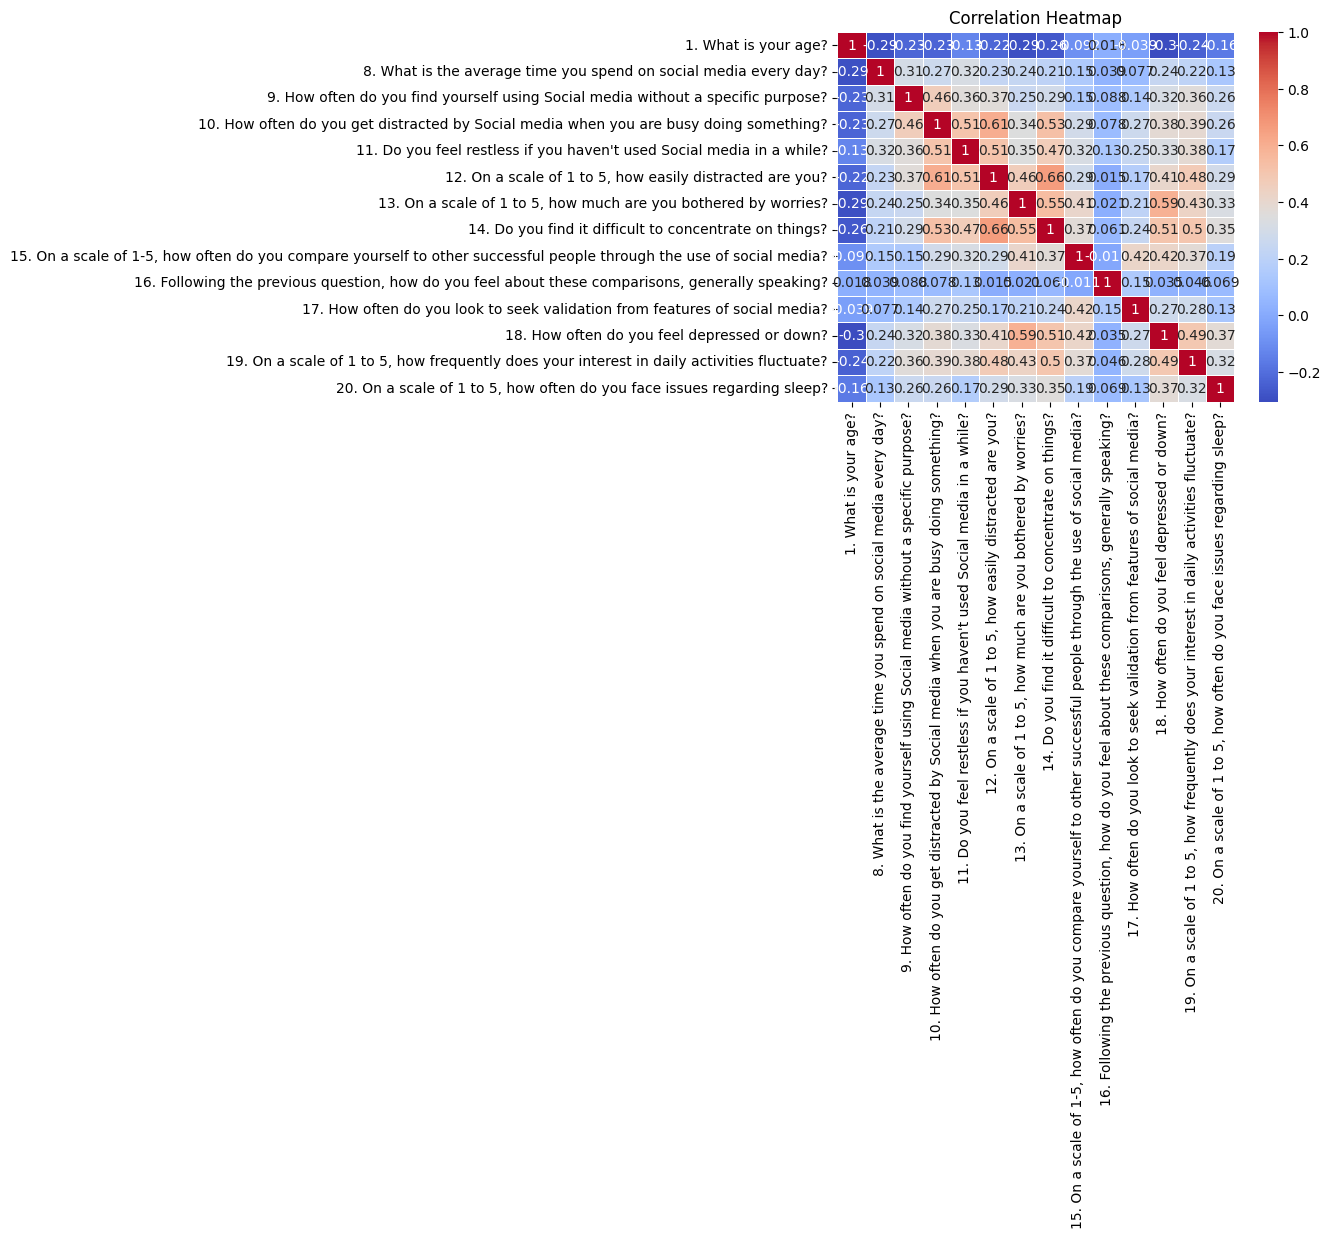

In [27]:
import seaborn as sns

# Calculate the correlation matrix for numeric columns
corr = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


11. Histogram: Distribution of social media time spent.

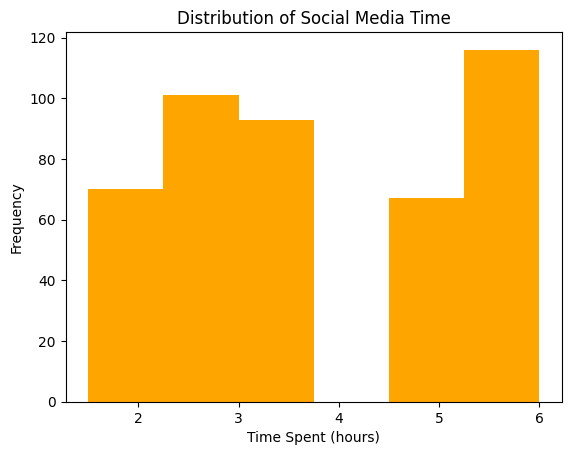

In [28]:
df['8. What is the average time you spend on social media every day?'].plot(kind='hist', bins=6, color='orange', title='Distribution of Social Media Time')
plt.xlabel('Time Spent (hours)')
plt.ylabel('Frequency')
plt.show()


12.  Box Plot: Social media time distribution by age groups.

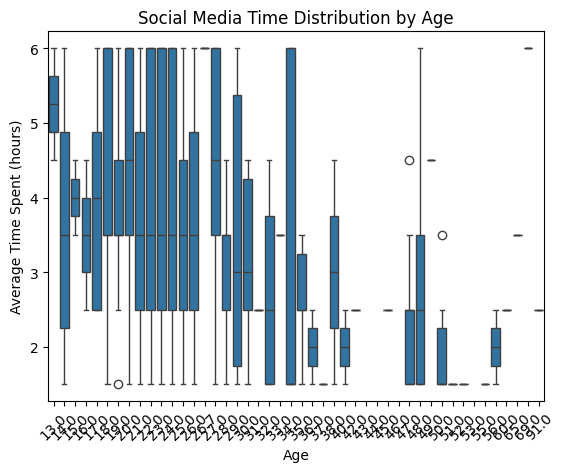

In [29]:
sns.boxplot(
    x='1. What is your age?',
    y='8. What is the average time you spend on social media every day?',
    data=df
)
plt.title('Social Media Time Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Average Time Spent (hours)')
plt.xticks(rotation=45)
plt.show()


13. Stacked Bar Chart: Social media time by age and organization type.

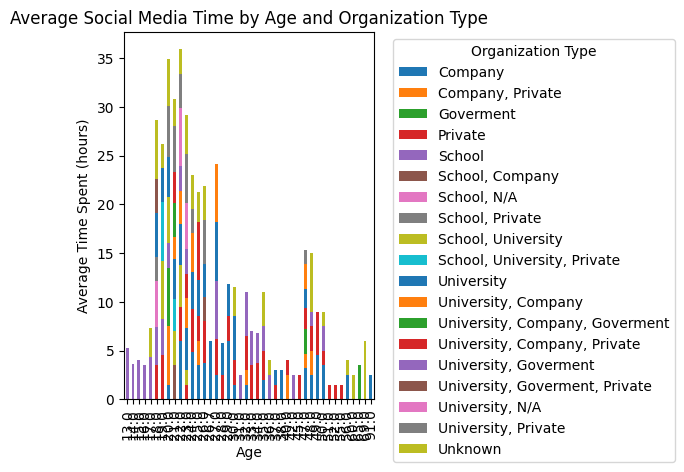

In [31]:
df.pivot_table(index='1. What is your age?', 
               columns='5. What type of organizations are you affiliated with?', 
               values='8. What is the average time you spend on social media every day?', 
               aggfunc='mean').plot(kind='bar', stacked=True)
plt.title('Average Social Media Time by Age and Organization Type')
plt.xlabel('Age')
plt.ylabel('Average Time Spent (hours)')
plt.legend(title='Organization Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


## 7. Conclusion
Based on the analysis and visualizations:

1. Gender Distribution:
The dataset has more female respondents than males.

2. Relationship Status:
A significant proportion of respondents are single, followed by those in relationships.

3. Social Media Usage:
Almost all respondents use social media, indicating its widespread adoption.

4. Social Media Time vs. Age:
Younger respondents tend to spend more time on social media daily.

5. Sleep Issues vs. Depression:
There appears to be a correlation between frequent sleep issues and higher levels of depression.